# Volume-weighted T/S Diagram from WOA & Models

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import xarray as xr
from xhistogram.xarray import histogram
import numpy as np
from matplotlib.colors import LogNorm
import gsw

In [6]:
woa_8110 = xr.open_dataarray('/home/jovyan/WMT/WOA/ts_hist_8110.nc')
woa_0517 = xr.open_dataarray('/home/jovyan/WMT/WOA/ts_hist_0517.nc')
ecco = xr.open_dataarray('/home/jovyan/WMT/ECCO-budgets/ts_hist_mean_ECCO.nc')
sose = xr.open_dataarray('/home/jovyan/WMT/SOSE-budgets/ts_hist_mean_SOSE.nc')

In [7]:
xdim_salt = np.arange(31, 35, 0.1)
ydim_temp = np.arange(-2.5, 8, 0.1)

print(ydim_temp.shape, xdim_salt.shape)

(105,) (40,)


In [8]:
sigma = np.empty([40, 105])
for j in range(40):
    for i in range(105):
        sigma[j, i] = gsw.sigma2(xdim_salt[j], ydim_temp[i])

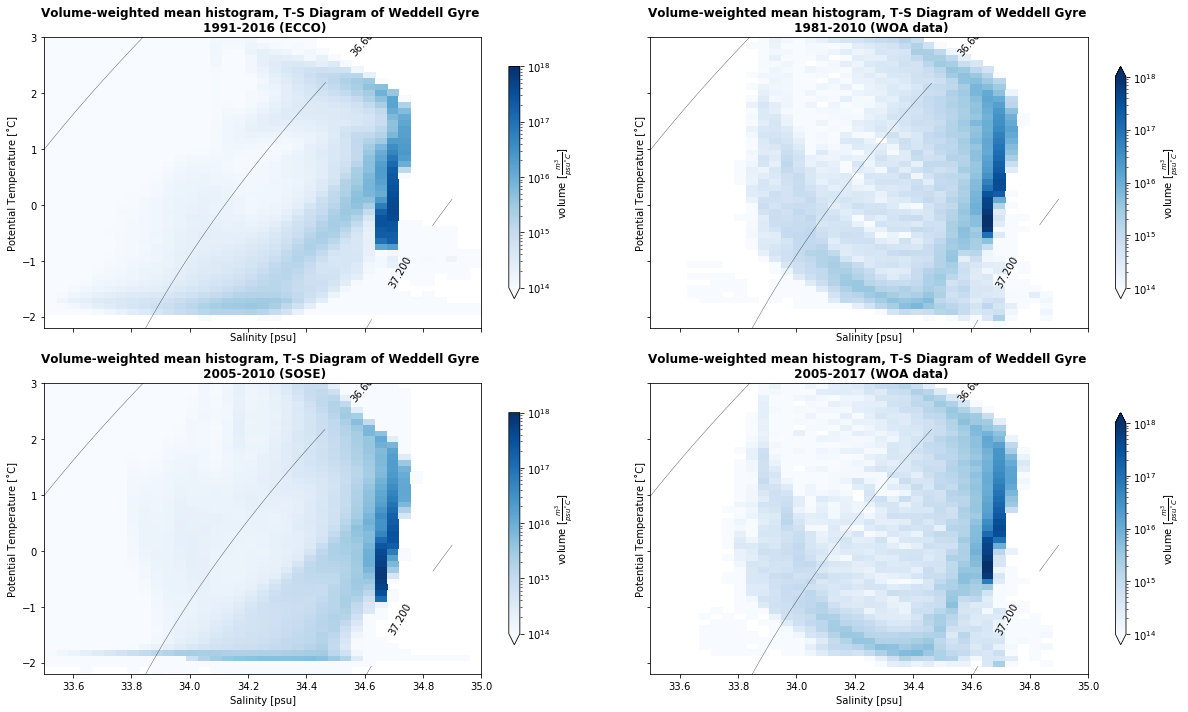

In [13]:
fig, axes = plt.subplots(2,2, figsize=(17,10), sharex=True, sharey=True)

C0 = axes[0,0].contour(xdim_salt, ydim_temp, sigma.T, colors='k', linewidths=0.3)
plt.clabel(C0)
ecco.where(ecco>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e14, vmax=1e18,
                        cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=axes[0,0])
axes[0,0].set_xlabel('Salinity [psu]')
axes[0,0].set_ylabel('Potential Temperature [˚C]')
axes[0,0].set_title('Volume-weighted mean histogram, T-S Diagram of Weddell Gyre \n 1991-2016 (ECCO)', fontweight='bold')

C1 = axes[1,0].contour(xdim_salt, ydim_temp, sigma.T, colors='k', linewidths=0.3)
plt.clabel(C1)
sose.where(sose>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e14, vmax=1e18,
                        cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=axes[1,0])
axes[1,0].set_xlabel('Salinity [psu]')
axes[1,0].set_ylabel('Potential Temperature [˚C]')
axes[1,0].set_title('Volume-weighted mean histogram, T-S Diagram of Weddell Gyre \n 2005-2010 (SOSE)', fontweight='bold')

C2 = axes[0,1].contour(xdim_salt, ydim_temp, sigma.T, colors='k', linewidths=0.3)
plt.clabel(C2)
woa_8110.where(woa_8110>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e14, vmax=1e18,
                                cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=axes[0,1])
axes[0,1].set_xlabel('Salinity [psu]')
axes[0,1].set_ylabel('Potential Temperature [˚C]')
axes[0,1].set_title('Volume-weighted mean histogram, T-S Diagram of Weddell Gyre \n 1981-2010 (WOA data)', fontweight='bold')

C3 = axes[1,1].contour(xdim_salt, ydim_temp, sigma.T, colors='k', linewidths=0.3)
plt.clabel(C3)
woa_0517.where(woa_0517>0).plot(norm=LogNorm(), cmap='Blues', vmin=1e14, vmax=1e18,
                                cbar_kwargs={'shrink':0.8, 'label': r'volume [$\frac{m^3}{psu ˚C}$]'}, ax=axes[1,1])
axes[1,1].set_xlabel('Salinity [psu]')
axes[1,1].set_ylabel('Potential Temperature [˚C]')
axes[1,1].set_title('Volume-weighted mean histogram, T-S Diagram of Weddell Gyre \n 2005-2017 (WOA data)', fontweight='bold')

plt.tight_layout()
plt.xlim(33.5, 35)
plt.ylim(-2.2, 3);